# DATA 620 - Week 3

The task this week is to 
1.  Load a graph of your choosing from a text file or other source into a graph database or NetworkX.
2.  Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.
3.  Use a visualization tool of your choice ( NetworkX, Neo4j, Gephi, etc.) to display information.
4.  Record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.


For this task I've chosen to work with a subset of the latest movielense data.

First, we'll set do some setup:

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

path = 'https://raw.githubusercontent.com/plb2018/data620/master/Week3/ml-latest-small/'
localPath = 'C:/Users/Paul/OneDrive - CUNY School of Professional Studies/CUNY/DATA 620/Week3/'
numRows = 100  #the number of rows we'll work with. 

Next, we'll do a bit of data wangling.  I was read a little bit about (Adjacency Lists)[https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.adjlist.html] and I figured that it could be a usefule way to work in this class (particularly to facilitate data-sharing in the HW team context) so I figured that I would start there.

In the Movielense data, the "movies.csv" file there is the main delimiter (comma) but also a pipe (|) delimiter within the "genres" column.  

And another note, we're gonna take all the "documentary" films out of this set because they don't seem to be connected in the context that I have set up this network.

In [30]:
#first we load and subset the data
movies = pd.read_csv(path+'movies.csv')
movies = movies.head(numRows)

#create the adjacency list
print(movies.shape)
movies["adjList"] = movies["title"].astype(str)+'|'+movies["genres"]
movies  = movies[~movies.adjList.str.contains("Documentary")]
adjList = movies.adjList
print(movies.shape)

#save adjlist locally and we'll manually move to github 
adjList.to_csv(localPath+'adj.csv',index=False)

print(movies["adjList"].head(5))

(100, 3)
(97, 4)
0    Toy Story (1995)|Adventure|Animation|Children|...
1            Jumanji (1995)|Adventure|Children|Fantasy
2               Grumpier Old Men (1995)|Comedy|Romance
3        Waiting to Exhale (1995)|Comedy|Drama|Romance
4            Father of the Bride Part II (1995)|Comedy
Name: adjList, dtype: object


In [31]:
#print(movies.title.values)

print(type(adjList[0]))
print(adjList[0])

G=nx.read_adjlist(localPath+'adj.csv',delimiter='|')


#check nodes and edges
print("Printing Nodes:")
for i,node in enumerate(G.nodes()):
    print(i,node)
print("\n")
    
print("Printing Edges:")
for i,edge in enumerate(G.edges()):
    print(i,edge)


<class 'str'>
Toy Story (1995)|Adventure|Animation|Children|Comedy|Fantasy
Printing Nodes:
0 Toy Story (1995)
1 Adventure
2 Animation
3 Children
4 Comedy
5 Fantasy
6 Jumanji (1995)
7 Grumpier Old Men (1995)
8 Romance
9 Waiting to Exhale (1995)
10 Drama
11 Father of the Bride Part II (1995)
12 Heat (1995)
13 Action
14 Crime
15 Thriller
16 Sabrina (1995)
17 Tom and Huck (1995)
18 Sudden Death (1995)
19 GoldenEye (1995)
20 "American President, The (1995)
21 Romance"
22 Dracula: Dead and Loving It (1995)
23 Horror
24 Balto (1995)
25 Nixon (1995)
26 Cutthroat Island (1995)
27 Casino (1995)
28 Sense and Sensibility (1995)
29 Four Rooms (1995)
30 Ace Ventura: When Nature Calls (1995)
31 Money Train (1995)
32 Get Shorty (1995)
33 Copycat (1995)
34 Mystery
35 Assassins (1995)
36 Powder (1995)
37 Sci-Fi
38 Leaving Las Vegas (1995)
39 Othello (1995)
40 Now and Then (1995)
41 Persuasion (1995)
42 "City of Lost Children, The (Cité des enfants perdus, La) (1995)
43 Sci-Fi"
44 Shanghai Triad (Yao a y

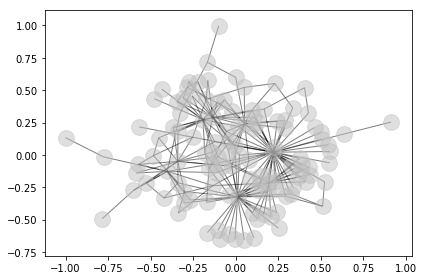

In [70]:
#draw and show the graph

#nx.draw_networkx_nodes(G,node_size=800, node_color='silver')
#nx.draw_networkx_edges(G,alpha=0.5,width=5,edge_color='m')
#nx.draw_networkx_labels(G,font_size=10,font_weight="bold")

nx.draw_networkx(G,with_labels=False,node_size=250,node_color='silver',alpha=0.5)

#fix the margins
plt.tight_layout()

#turn off the axis
plt.axis('on')

#display the graph
plt.show()

We can see the graph of the network above.  Based on what we know about the data, we can guess that the nodes with the most activity are popular movie "genres" and that the rest are movie titles.  If time remains, I intend to clean up this graph and add a bit more information.

Now we'll compute the (diameter)[https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.distance_measures.diameter.html] using the networkx builtin function.  The diameter of the graph is the maximum eccentricity, which is basically the farthest distance between two points.

In [33]:
d = nx.diameter(G)
print(d)

7


We can see from the above that the diameter of this particular graph is 7.  Next we'll look at hubs and authorities using (hits)[https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.link_analysis.hits_alg.hits.html].  

Hubs are nodes which have links greatly in excess of the average.  In our case, we would expect movies that span multiple genres to be considered hubs, which is essentially what we see.

In this context, an "Authority" is a node which links to many hubs.  Give the above assessment of hubs, we should expect that, for the most part, authorities should intuitively be somewhat similar to "genres" here.  Let's check:  

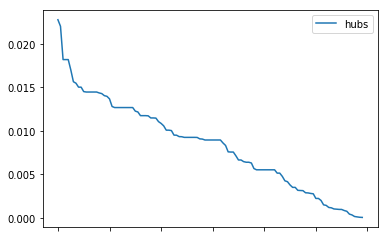

                                                    hubs
Drama                                           0.022779
Money Train (1995)                              0.022025
Beautiful Girls (1996)                          0.018196
Mighty Aphrodite (1995)                         0.018196
Waiting to Exhale (1995)                        0.018196
To Die For (1995)                               0.017001
Copycat (1995)                                  0.015651
Things to Do in Denver When You're Dead (1995)  0.015479
"Postman, The (Postino, Il) (1994)              0.015025
"American President, The (1995)                 0.015025
Pocahontas (1995)                               0.014514
Big Bully (1996)                                0.014465
Nobody Loves Me (Keiner liebt mich) (1994)      0.014465
In the Bleak Midwinter (1995)                   0.014465
Kicking and Screaming (1995)                    0.014465
Antonia's Line (Antonia) (1995)                 0.014465
"Crossing Guard, The (1995)    

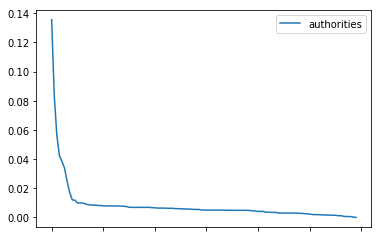

                                                authorities
Drama                                              0.135507
Comedy                                             0.083567
Romance                                            0.056508
Crime                                              0.042408
Thriller                                           0.038414
Action                                             0.033677
Adventure                                          0.024674
Children                                           0.017112
Money Train (1995)                                 0.012023
Horror                                             0.011860
Beautiful Girls (1996)                             0.009933
Waiting to Exhale (1995)                           0.009933
Mighty Aphrodite (1995)                            0.009933
To Die For (1995)                                  0.009281
Mystery                                            0.008848
Copycat (1995)                          

In [67]:
h,a=nx.hits(G)

h = pd.DataFrame.from_dict(data=h,orient='index',columns=['hubs'])
h.sort_values(by='hubs',ascending=False,inplace=True)
h.plot()
plt.show()

print(h.head(20))


a = pd.DataFrame.from_dict(data=a,orient='index',columns=['authorities'])
a.sort_values(by='authorities',ascending=False,inplace=True)
a.plot()
plt.show()


print(a.head(20))

